# Episode 04: utilities wrap up

Checking the board visually is fine for debugging but it does not work well when it comes to test a lot of board solutions.

This episode provides some utilities for the POC to come. The goal is to have reasonably efficient classes but not spend too much time on this step.

**Goals for this episode:**
- Answer recurring questions 
    - What are the width, height, nulber of cellss of the puzzle 
    - Given a board is it completed ? 
    - Does it break the clues ?
    - Are they cells left undefined ? 
    - Am I close to the goal ?


# 1. Elements from episodes 01, 02 and 03

TODO

Requirements listed in Episode 02 still uncovered
- a game engine which provides the game validation for try-and-error validation and solved board - for all kind of puzzles (we have tested 2x2 only)
- some operation thate were identified in episode 01: is the board completed, is the board valid
- a puzzle class with some operations to transform the clues and compute black count and cels count
- try-and-error and learning process will require something in between not done and done in order to improve on residual error or rewards: number of cells completed/undefined, number of errors, number of valid cells


# 2. Experiments

# 5. Wrap up

WThe class and solutions are saved in episode04.py.


## 5.1. Quick test of saved classes

In [15]:
# reset all variables from tests
%reset -f

classes implementatation [samples.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/samples.py)

classes implementatation [puzzle.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/puzzle.py)

classes implementatation [board.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/board.py)

classes implementatation [gameengine.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/gameengine.py)

classes implementatation [boardplotter.py](https://raw.githubusercontent.com/cfalguiere/python_experiments/master/nono/episode03c/boardplotter.py)

In [16]:
from episode04.samples import clues2x2, clues5x5s, solution2x2, solution5x5s
from episode04.puzzle import Puzzle
from episode04.board import Board, BoardMark
from episode04.gameengine import NonoGameEngine, SolvedNonoGameEngine

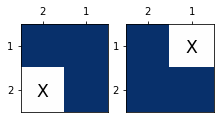

In [17]:
# no solution provided
puzzle2x2 = Puzzle(clues2x2)
assert puzzle2x2.is_consistent()

game2x2 = NonoGameEngine(puzzle2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

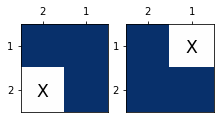

In [18]:
# with solution
puzzle2x2 = Puzzle(clues2x2)
game2x2 = SolvedNonoGameEngine(puzzle2x2, solution2x2, track=True)

game2x2.submit([1,1,0,1])
game2x2.submit([1,0,1,1])

game2x2.show_all()

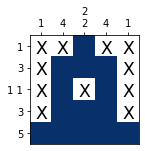

In [19]:
# submit 5x5s
puzzle5x5s = Puzzle(clues5x5s)
assert puzzle5x5s.is_consistent()

game5x5s = NonoGameEngine(puzzle5x5s)

game5x5s.submit(solution5x5s.reshape(puzzle5x5s.cells_count).tolist())
assert game5x5s.is_solved()

game5x5s.show()

In [20]:
print('okay')

okay


TODO doc clean up an refactoring

Type annotations and associated type cheks

interesting resources https://cjolowicz.github.io/posts/hypermodern-python-04-typing/

Documentation and doc check

more lint options 
    "flake8-bandit", "flake8-black", "flake8-bugbear", "flake8-import-order")
https://pypi.org/project/flake8-black/

introduce select one by one
ANN,B,B9,BLK,C,E,F,I,S,W
ANN annotations
B
B9 Black (MIT)
BLK Black (MIT)
C
E
F
I
S
W

a documenter en 01

import in alphabetioc order
build in first 

mypy

episode04/gameengine.py:137: error: Call to untyped function "show_all" in typed context
episode04/gameengine.py:145: error: Function is missing a type annotation
episode04/gameengine.py:147: error: Call to untyped function "__init__" in typed context
episode04/gameengine.py:156: error: Function is missing a type annotation
episode04/gameengine.py:170: error: Call to untyped function "mark" in typed context
episode04/gameengine.py:176: error: Function is missing a type annotation
episode04/gameengine.py:183: error: Call to untyped function "fill_all" in typed context
episode04/gameengine.py:195: error: Function is missing a return type annotation

        
episode04/gameengine.py:156: error: Function is missing a type annotation
episode04/gameengine.py:170: error: Call to untyped function "mark" in typed context
episode04/gameengine.py:176: error: Function is missing a type annotation
episode04/gameengine.py:183: error: Call to untyped function "fill_all" in typed context
episode04/gameengine.py:195: error: Function is missing a return type annotation


from typing import List
def submit(self, states_list: List[int], apply: bool = True):
    
   pour argument nommé attention à l'espace 


https://sadh.life/post/mypy-guide/


ClueType = Dict[str, List[Union[List[int], int]]]
SolutionType = npt.arrayLike

ClueType = Union[List[int], int]
CluesType = Dict[str, List[ClueType]]
SolutionType = npt.ArrayLike


def show_all(self, some_boards: Optional[List[Board]] = None):
        """Plot several boards."""
        boards = some_boards
        if some_boards is None:
            boards = self.boards


mypy force annotation mais bmoque sur types complexes
pytype inference moins d'erreurs mais laxiste, et plus lent - todo 

https://google.github.io/pytype/

    def show_all(self, some_boards: Optional[List[Board]] = None) -> None:
        """Plot several boards."""
        boards: List[Board] = \
            self.boards if some_boards is None else some_boards

        # max 12
        # TODO nb depending on board size
        cols_mapping = {2: 7, 5: 5}
        n_cols = cols_mapping[self.width]
        n_lines = ceil(len(boards) / n_cols)

        fig = plt.figure()
        fig.subplots_adjust(left=5, right=15, top=13, bottom=5)

        for i, board in enumerate(boards):
            # enumerate is base 0. figures are labelled base 1
            # TODO explain slots names
            plt.rcParams['figure.figsize'] = [self.fig_width, self.fig_height]
            ax = fig.add_subplot(n_lines, n_cols, i + 1)
            self._plot(board, ax)

        plt.show()  # 

-> Optional[List[Board]] is not a list -> mypy errors
design smell
show_sequence
append_to_sequence
show_many param

    def append_to_sequence(self, a_board: Board) -> None:
        """Append a board to a sequence of boards (history of states)."""
        self.sequence.append(a_board)

    def show_sequence(self) -> None:
        """show the sequence of boards."""
        self.show_many(self.sequence)

    def show_many(self, some_boards: List[Board]) -> None:
        """Plot several boards."""
        # max 12


othr rework

    def __init__(self, some_clues: CluesType):
        """Construct a BoardPlotter."""
        self.clues = some_clues

        # board dimensions
        self.width = len(self.clues['rows'])
        self.height = len(self.clues['cols'])
        self.flat_length = self.width * self.height

        # guess the figure size
        # rule of thumb
        # 1 fits 2 cells
        # 2 fits 5 cols
        self.fig_width = int(self.width / 2)
        self.fig_height = int(self.height / 2)

        # labels
        def row_clue_to_label(v: ClueType) -> str:
            is_list = isinstance(v, list)
            return str(v) if not is_list else ' '.join(map(str, v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        def col_clue_to_label(v: ClueType) -> str:
            # print(v)
            is_list = isinstance(v, list)
            return str(v) if not is_list else '\n'.join(map(str, v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))


        ->
        
            def __init__(self, a_puzzle: Puzzle):
        """Construct a BoardPlotter."""
        self.clues = a_puzzle.given_clues

        # board dimensions
        self.width = len(self.clues['rows'])
        self.height = len(self.clues['cols'])
        self.flat_length = self.width * self.height

        # guess the figure size
        # rule of thumb
        # 1 fits 2 cells
        # 2 fits 5 cols
        self.fig_width = int(self.width / 2)
        self.fig_height = int(self.height / 2)

        # labels
        def to_label(v: NormClueType, sep: str = '') -> str:
            return sep.join(map(str, v))

        rows_to_label = partial(to_label, sep=' ')
        cols_to_label = partial(to_label, sep='\n')

        norm_clues = a_puzzle.norm_clues
        self.rows_labels = list(map(rows_to_label, norm_clues['rows']))
        self.columns_labels = list(map(cols_to_label, norm_clues['cols']))

        
        
eviter le Union (List in , int)

        board_rows = self.get_rows_blocks()
        clues_rows = self.puzzle.norm_clues["rows"]
        rows_errors = sum([abs(sum(b) - sum(c))
                           for (b, c) in zip(board_rows, clues_rows)])

        
        
Actually passed: (iterable: int)
  Attributes of protocol Iterable[_SummableT] are not implemented on int: __iter__
File "/Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/episode03c/gameengine.py", line 108, in count_errors: Built-in function sum was called with the wrong arguments [wrong-arg-types]
         Expected: (iterable: Iterable[_Summable])
  Actually passed: (iterable: int)

    
    refacto
        # for rows
        sums_board_rows = [sum(b) for b in self.get_rows_blocks()]
        sums_clues_rows = [sum(c) for c in self.puzzle.norm_clues["rows"]]
        rows_errors = sum([abs(b - c)
                           for (b, c) in zip(sums_board_rows, sums_clues_rows)])

        # for cols
        sums_board_cols = [sum(b) for b in self.get_cols_blocks()]
        sums_clues_cols = [sum(c) for c in self.puzzle.norm_clues["cols"]]
        cols_errors = sum([abs(b - c)
                           for (b, c)
                           in zip(sums_board_cols, sums_clues_cols)])

  
    
refacto
            def axis_errors(blocks, clues):
            sums_board = [sum(b) for b in blocks]
            sums_clues = [sum(c) for c in clues]
            errors = sum([abs(b - c)
                          for (b, c)
                          in zip(sums_board, sums_clues)])
            return errors

        rows_errors = axis_errors(self.get_rows_blocks(),
                                  self.puzzle.norm_clues["rows"])

        cols_errors = axis_errors(self.get_cols_blocks(),
                                  self.puzzle.norm_clues["cols"])

        return int((rows_errors + cols_errors) / 2)  # row error => col error
    
    
STILL errors
/Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/.nox/pytype/bin/python -m pytype.single --imports_info /Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/.pytype/imports/episode03d.gameengine.imports --module-name episode03d.gameengine --platform darwin -V 3.8 -o /Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/.pytype/pyi/episode03d/gameengine.pyi --analyze-annotated --nofail --quick /Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/episode03d/gameengine.py
File "/Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/episode03d/gameengine.py", line 112, in count_errors: Built-in function sum was called with the wrong arguments [wrong-arg-types]
         Expected: (iterable: Iterable[_Summable])
  Actually passed: (iterable: int)
  Attributes of protocol Iterable[_SummableT] are not implemented on int: __iter__
File "/Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/episode03d/gameengine.py", line 119, in count_errors: Built-in function sum was called with the wrong arguments [wrong-arg-types]
         Expected: (iterable: Iterable[_Summable])
  Actually passed: (iterable: int)
  Attributes of protocol Iterable[_SummableT] are not implemented on int: __iter__

F


    # todo document that ignore unfilled
    def count_errors(self) -> int:
        """Compute the difference between given board states sum and clues."""

         def axis_errors(blocks: List[int], clues: NormCluesType) -> int:
            sums_board = [sum(b) for b in blocks]
            sums_clues = [sum(c) for c in clues]
            errors = sum([abs(b - c)
                          for (b, c)
                          in zip(sums_board, sums_clues)])
            return errors

ClueType = Union[List[int], int]
CluesType = Dict[str, List[ClueType]]
NormClueType = List[List[int]]
NormCluesType = Dict[str, NormClueType]
->

ClueType = Union[List[int], int]
CluesType = Dict[str, List[ClueType]]
NormClueType = List[int]
NormCluesType = Dict[str, List[NormClueType]]
SolutionType = npt.ArrayLike

ColorMapType = Any

also change the signature 

        def axis_errors(blocks: List[int], clues: List[NormClueType]) -> int:
            sums_board = [sum(b) for b in blocks]
            sums_clues = [sum(c) for c in clues]
            errors = sum([abs(b - c)
                          for (b, c)
                          in zip(sums_board, sums_clues)])
            return errors
        
        
File "/Users/cfalguiere/Documents/2022-03/git-repos/python_experiments/nono/episode03d/gameengine.py", line 113, in axis_errors: Built-in function sum was called with the wrong arguments [wrong-arg-types]
         Expected: (iterable: Iterable[_Summable])
  Actually passed: (iterable: int)
  Attributes of protocol Iterable[_SummableT] are not implemented on int: __iter__


        def axis_errors(blocks: List[int], clues: List[NormClueType]) -> int:
            sums_clues = [sum(c) for c in clues]
            errors = sum([abs(b - c)
                          for (b, c)
                          in zip(blocks, sums_clues)])
            return errors

        it worked beacuse implementation is lenien

also fixed was list of list

    def get_rows_blocks(self) -> List[int]:   
        """Compute blocks for each rows."""
        rows = self.board.states
        blocks = [[len(list(g)) for k, g in groupby(line) if k == 1]
                  for line in rows]
        return blocks


tytemp remove mypy to debug

config 
strict )->
[mypy]
disallow_untyped_defs = True
disallow_any_unimported = True
no_implicit_optional = True
check_untyped_defs = True
warn_return_any = False
warn_unused_ignores = True
show_error_codes = true

[episode*.test_*]
disallow_untyped_defs = True

[numpy]
ignore_missing_imports = True


https://mypy.readthedocs.io/en/stable/config_file.html
https://blog.wolt.com/engineering/2021/09/30/professional-grade-mypy-configuration/

errors on external libs

episode03a/boardplotter.py:8: error: Skipping analyzing "matplotlib.pyplot": module is installed, but missing library stubs or py.typed marker  [import]
episode03a/boardplotter.py:8: note: See https://mypy.readthedocs.io/en/stable/running_mypy.html#missing-imports
episode03a/boardplotter.py:8: error: Skipping analyzing "matplotlib": module is installed, but missing library stubs or py.typed marker  [import]

[numpy, matplotlib.*]
ignore_missing_imports = True
              

mypy

episode04/gameengine.py:129: error: Incompatible return value type (got "List[List[int]]", expected "List[int]")  [return-value]
episode04/gameengine.py:141: error: Incompatible return value type (got "List[List[int]]", expected "List[int]")  [return-value]

            def get_rows_blocks(self) -> List[List[int]]:
        """Compute blocks for each rows."""
        rows = self.board.states
        blocks = [[len(list(g)) for k, g in groupby(line) if k == 1]
                  for line in rows]
        return blocks
        
impact
    def count_errors(self) -> int:
        """Compute the difference between given board states sum and clues."""
        def axis_errors(blocks: List[List[int]], clues: List[NormClueType]) -> int:
            sums_blocks = [sum(b) for b in blocks]
            sums_clues = [sum(c) for c in clues]
            errors = sum([abs(b - c)
                          for (b, c)
                          in zip(sums_blocks, sums_clues)])
            return errors


typer les Any, au cas ou changerait apres et pour avoir un nom

exemple
episode03c/gameengine.py:148: error: Item "_NestedSequence[Union[bool, int, float, complex, str, bytes]]" of "Union[_SupportsArray[dtype[Any]], _NestedSequence[_SupportsArray[dtype[Any]]], bool, int, float, complex, str, bytes, _NestedSequence[Union[bool, int, float, complex, str, bytes]]]" has no attribute "reshape"  [union-attr]
episode03c/gameengine.py:162: error: Value of type "Union[_SupportsArray[dtype[Any]], _NestedSequence[_SupportsArray[dtype[Any]]], bool, int, float, complex, str, bytes, _NestedSequence[Union[bool, int, float, complex, str, bytes]]]" is not indexable  [index]
episode03c/gameengine.py:162: error: No overload variant of "__getitem__" of "_NestedSequence" matches argument type "Tuple[int, int]"  [call-overload]

                def __init__(self,
                 a_puzzle: Puzzle, a_solution: SolutionType,
                 track: bool = False):
        """Construct a GameEngine."""
        super().__init__(a_puzzle, track)



more  sense - not detected by pytype 
episode03a/boardplotter.py:39: error: Argument 2 to "map" has incompatible type "Union[List[int], int]"; expected "Iterable[int]"  [arg-type]
episode03a/boardplotter.py:45: error: Argument 2 to "map" has incompatible type "Union[List[int], int]"; expected "Iterable[int]"  [arg-type]
episode03d/gameengine.py:61: error: Need type annotation for "board_states_history" (hint: "board_states_history: List[<type>] = ...")  [var-annotated]
episode03d/gameengine.py:63: error: Return type "bool" of "play" incompatible with return type "None" in supertype "BoardGameEngine"  [override]
episode03d/gameengine.py:176: error: Return type "bool" of "play" incompatible with return type "None" in supertype "BoardGameEngine"  [override]
episode03c/gameengine.py:25: error: Function is missing a return type annotation  [no-untyped-def]
Found 6 errors in 3 files (checked 32 source files)


    def play(self,
             row: int, col: int, mark: BoardMark,
             apply: bool = True) -> bool:
        """Play one cell.

        Implementation shouod be provided by the subclass.
        It is used in play_multiple.
        """
        pass


episode03c/gameengine.py:170: error: Returning Any from function declared to return "bool"  [no-any-return]
    

    def play(self,
             row: int, col: int, mark: BoardMark,
             apply: bool = True) -> bool:
        """Play one cell.

        Play the game by sending the state of one cell.
        Check whether an action is valid given a solution.
        If apply is True, update the board.
        """
        okay = self.solution[row, col] == mark.value
        if not okay:
            self.errors += 1

        if apply:
            # apply the real state which is what games usually do
            true_mark = BoardMark(self.solution[row, col])
            self.board.mark(row, col, true_mark)
        return okay
    
    
    -> return bool(okay)



__eq__ returns Any, not bool, as counter-intuitive as this sounds. See also this question. – 
MrBean Bremen
Dec 23, 2021 at 7:27


episode03a/boardplotter.py:39: error: Argument 2 to "map" has incompatible type "Union[List[int], int]"; expected "Iterable[int]"  [arg-type]
episode03a/boardplotter.py:45: error: Argument 2 to "map" has incompatible type "Union[List[int], int]"; expected "Iterable[int]"  [arg-type]

                    def row_clue_to_label(v: ClueType) -> str:
            is_list = isinstance(v, list)
            return str(v) if not is_list else ' '.join(map(str, v))
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))

        def col_clue_to_label(v: ClueType) -> str:
            # print(v)
            is_list = isinstance(v, list)
            return str(v) if not is_list else '\n'.join(map(str, v))
        self.columns_labels = list(map(col_clue_to_label, self.clues['cols']))

        
fixed later

map does not feature out is is a list and not a union

KO             return str(v) if not is_list else ' '.join(map(str, list(v)))
same with list

overloading linked to union

episode03c/gameengine.py:162: error: No overload variant of "__getitem__" of "bytes" matches argument type "Tuple[int, int]"  [call-overload]
episode03c/gameengine.py:162: note:     def __getitem__(self, SupportsIndex) -> int
episode03c/gameengine.py:162: note:     def __getitem__(self, slice) -> bytes
episode03c/gameengine.py:162: note:     def __getitem__(self, int) -> Union[complex, str, bytes, _NestedSequence[Union[bool, int, float, complex, str, bytes]]]
episode03c/gameengine.py:162: note:     def __getitem__(self, slice) -> _NestedSequence[Union[bool, int, float, complex, str, bytes]]


        def to_label(v: Any, sep: str) -> str:
            return sep.join(map(str, v))

        def row_clue_to_label(v: ClueType) -> str:
            is_list = isinstance(v, list)
            return str(v) if not is_list else to_label(v, ' ')
        self.rows_labels = list(map(row_clue_to_label, self.clues['rows']))
